In [19]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
advertising = pd.read_csv('tvmarketing.csv')

In [4]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [7]:
advertising.shape

(200, 2)

In [8]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualizing Data

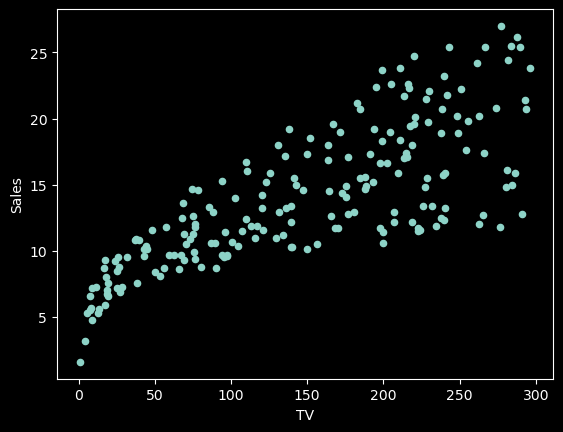

In [21]:
# Visualize the Relationship between the Features and the response
advertising.plot(x = 'TV',y = 'Sales',kind = 'scatter')
plt.style.use('dark_background')


# Performing Linear Regression

In [23]:
# putting Feature to x (input)
x = advertising['TV']

x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [24]:
# putting response to y (Target)
y = advertising['Sales']

y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Split data into training and testing sets

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test , y_train,y_test = train_test_split (x,y, test_size = 0.2, random_state=0)
# x_train,x_test , y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state=0)

In [26]:
x_train.shape

(160,)

In [27]:
y_train.shape

(160,)

In [28]:
x_test.shape

(40,)

In [29]:
y_test.shape

(40,)

In [43]:
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train[:,np.newaxis]
y_train = y_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]
y_test = y_test[:,np.newaxis]

In [40]:
x_train.shape,y_train.shape

((160, 1), (160, 1))

# linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()

In [37]:
linearModel.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
# print intercept and coefficients
print(linearModel.intercept_)
print(linearModel.coef_)

[7.29249377]
[[0.04600779]]


# Predictions

In [44]:
y_pred = linearModel.predict(x_test)

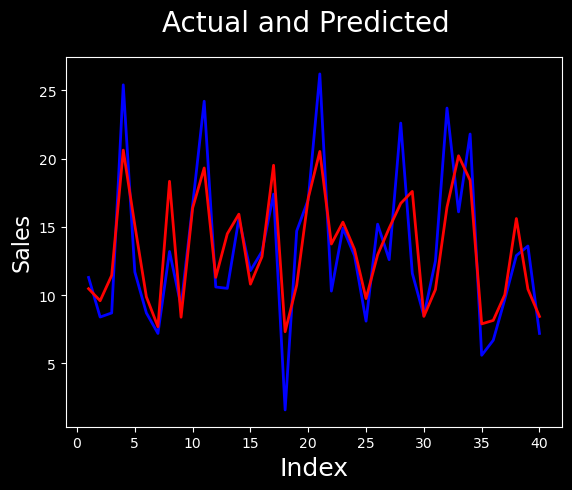

In [46]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,41,1)]          
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Sales', fontsize=16)  
plt.style.use('dark_background')

In [47]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_pred,y_test)

In [48]:
print('Mean squared error',MSE)

Mean squared error 10.186181934530214


Text(0.5, 1.0, 'Predictions')

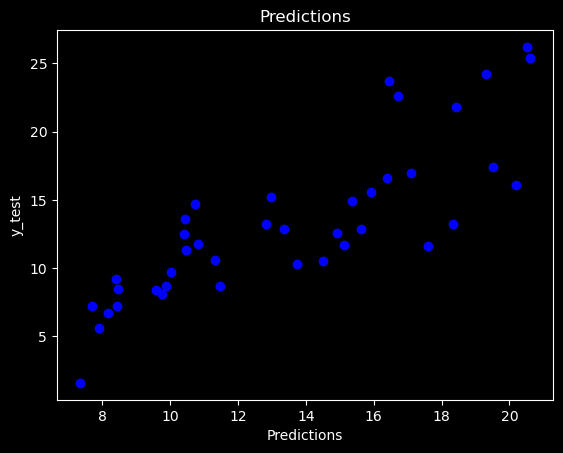

In [50]:
plt.scatter(y_pred,y_test,color = 'blue')
plt.style.use('dark_background')
plt.xlabel('Predictions')
plt.ylabel('y_test')
plt.title('Predictions')